<a href="https://colab.research.google.com/github/afham123/Traditional-Ml-Algorithms/blob/main/Kaggle_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
X=df.iloc[:,[1,2,3,4]].values
y=df.iloc[:,5].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

In [22]:
X_train.shape,y_train.shape

((120, 4), (120,))

In [23]:
X_test.shape,y_test.shape

((30, 4), (30,))

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.gaussian_process.kernels import RBF 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [19]:
names = ['Nearest_Neighbors','Linear_SVM','Polynomial_SVM','RBF_SVM','Gaussian_Process','Gradient_Boosting','Decision_Tree','Extra_Trees','Random_Forest','Neural_Net','AdaBoost','Naive_Bayes','QDA','SGD']

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='linear',C=0.025),
    SVC(kernel='poly',degree=3,C=0.025),
    SVC(kernel='rbf',C=1,gamma=2),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10,min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1,max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss='hinge',penalty='l2')
]

In [24]:
scores =[]
for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    scores.append(score)

In [25]:
scores

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 0.8666666666666667]

In [26]:
df1 = pd.DataFrame()
df1['name'] = names
df1['score'] = scores
df1

,name,score
0,Nearest_Neighbors,0.966667
1,Linear_SVM,0.966667
2,Polynomial_SVM,0.966667
3,RBF_SVM,0.966667
4,Gaussian_Process,1.000000
5,Gradient_Boosting,1.000000
6,Decision_Tree,0.966667
7,Extra_Trees,0.966667
8,Random_Forest,1.000000
9,Neural_Net,0.966667


In [27]:
cm = sns.light_palette('green',as_cmap=True)
s = df1.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.966667
1,Linear_SVM,0.966667
2,Polynomial_SVM,0.966667
3,RBF_SVM,0.966667
4,Gaussian_Process,1.000000
5,Gradient_Boosting,1.000000
6,Decision_Tree,0.966667
7,Extra_Trees,0.966667
8,Random_Forest,1.000000
9,Neural_Net,0.966667


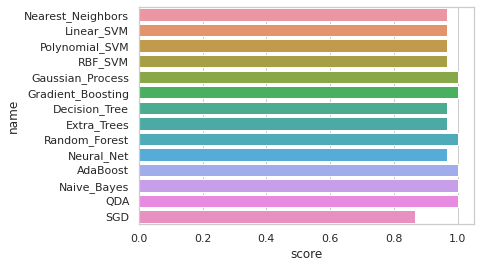

In [28]:
sns.set(style='whitegrid')
ax = sns.barplot(y='name',x='score',data=df1)